# Logistic Regression分类乳腺癌数据

In [15]:
import pandas as pd #读csv
import numpy as np
import matplotlib.pyplot as plt

## 读取数据

In [16]:
df = pd.read_csv('/home/ysq/桌面/BreastCancer/wdbc.data',header=None)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
0     569 non-null int64
1     569 non-null object
2     569 non-null float64
3     569 non-null float64
4     569 non-null float64
5     569 non-null float64
6     569 non-null float64
7     569 non-null float64
8     569 non-null float64
9     569 non-null float64
10    569 non-null float64
11    569 non-null float64
12    569 non-null float64
13    569 non-null float64
14    569 non-null float64
15    569 non-null float64
16    569 non-null float64
17    569 non-null float64
18    569 non-null float64
19    569 non-null float64
20    569 non-null float64
21    569 non-null float64
22    569 non-null float64
23    569 non-null float64
24    569 non-null float64
25    569 non-null float64
26    569 non-null float64
27    569 non-null float64
28    569 non-null float64
29    569 non-null float64
30    569 non-null float64
31    569 non-null float64
dtypes: float64(30), int64(1), obj

### df.info()返回了数据集的摘要，可以看出：
- 数据集为569*31的矩阵，即有569条数据，每条数据有31个属性
- 属性0为每个样本的唯一ID，这个属性在分类时用不到，可以删除
- 属性1为非数值型数据，是每个数据为良性或恶性的标记，可作为分类的真值
- 属性2~31为数值型数据，这些属性将作为我们分类时用到的属性，可以认为一个数据是否为良性或恶性由这些属性决定
- 该数据集中没有缺失值

## 数据预处理
- 删除ID列，即第0列
- 对2~31列的数据标准化处理
- 为标签编码
- 增广矩阵：添加一个全1列为偏置做准备

In [18]:
#df = df[~df[0].isin([911296202,865423,8610862])]
#删除第0列
df_ = df.drop(df.columns[0],axis=1)
print(df_.shape) #显示是否删除成功
if df_.shape[1] == df.shape[1]-1:
    print("删除成功")

(569, 31)
删除成功


In [19]:
df_.head() #查看当前数据

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [20]:
#数据标准化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()#实例化
df_tmp = df_.drop(df.columns[1],axis=1)
std = scaler.fit_transform(df_tmp) #ndarray
#将ndarray转为dataframe
df_std = pd.DataFrame(std)
df_std.shape

(569, 30)

### 统计数据集中良性(benign)和恶性(malignant)的个数

In [21]:
label_list = df_[1].values.tolist() #将标签列转为列表
dict(zip(*np.unique(label_list, return_counts=True)))
# 有357个良性，212个恶性 
print(label_list)

['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'M',

### 对标记列进行one-hot编码
- 将M--恶性 编码为1，将B-- 良性编码为0

In [22]:
from sklearn.preprocessing import LabelEncoder
coder = LabelEncoder()#实例化
label = coder.fit_transform(label_list) #y空间
print(label.shape)
#将M--恶性 编码为1，将B-- 良性编码为0

(569,)


### 对整个数据集进行扩展，增加偏置，为每个样本x增加一列全1的列向量

In [23]:
df_std['bias'] = np.ones(df_std.shape[0])

#### 将编码后的列作为属性label加入df_std(已标准化后的dataframe)
当前，所有数据已被标准化，data就是X空间，label就是Y空间 

In [24]:
data = df_std.values #X空间

## 构建模型

### 预测函数h 以及几个辅助函数

In [25]:
import math
def compute_hypothesis(row_vector,theta):
    """
        计算一个行向量（如我们训练集中的某一行）在参数theta下的预测输出
        theta为一个列向量
        实际意义是：该输出代表着该样本有多大概率为恶性,输出为float64且介于0~1
    """
   #print("行向量维数:",row_vector.shape,'\n',"theta维数",theta.shape)
    foo = row_vector@theta #向量内积
    #numpy算出来的值是ndarray，需要转换，这里直接取出来就好
    #foo = foo[0][0] #取出内积的实数值
    denominator = 1+math.exp(-1*foo)
    return 1/denominator

def hypothesis(X,theta):
    """
        ----
        该函数用于计算预测值的向量形式
        ----
        参数： X:数据矩阵，每一行为一个数据
          theta:参数列向量
        返回值：h_theta 是一个列向量，表明当前训练集下每个样本的预测值
    """
    h_theta = []#一个用于接收theta每个分量的列表
    for i in range(X.shape[0]):
        theta_i = compute_hypothesis(X[i],theta)
        h_theta.append(theta_i)
    h_theta = np.array(h_theta) #将list转为ndarray
    #print(h_theta.shape)
    return h_theta
def ln_on_vector(column_vector):
    """
        对一个列向量中所有值进行取自然对数，返回一个列向量
    """
    ln_list = []#用于接收对数值的列表
    for i in range(column_vector.shape[0]):
        foo = math.log(column_vector[i])#计算自然对数
        ln_list.append(foo)#添加进列表
    return np.array(ln_list)

In [26]:
class LogisticRegression:
    def __init__(self,X_train,y_train):
        """
            初始化传入训练集X_train,y_train, datatype为list类型
            theta为模型的参数
        """
        self.X_train = X_train
        self.y_train = y_train.reshape(y_train.shape[0],-1) #把标签拉成列向量
        self.theta = np.zeros(X_train.shape[1]).reshape(-1,1) 
        ###
            #self.theta一定要reshape不然后面梯度下降会出错，矩阵运算出错！！！！
        ###
        #print(self.theta.shape,self.theta)
    def cost_function(self):
        """
            计算代价函数
        """
        #获取当前训练集中每个样本的预测值列向量
        h_theta = hypothesis(self.X_train,self.theta)
        #获取样本总个数
        n = self.X_train.shape[0]
        tmp1 = ln_on_vector(h_theta).reshape(-1,1)#拉成列向量
        tmp2 = ln_on_vector((np.ones(h_theta.shape[0])-h_theta).reshape(-1,1))
        one = np.ones(self.y_train.shape[0]).reshape(-1,1)
        tmp3 = one - self.y_train
        J = -1/n*((self.y_train.T)@tmp1+tmp3.T@tmp2)
        print("当前代价函数为:",J)
    
    def compute_gradient(self):
        """
            计算代价函数J关于theta的导数
            返回一个导数列向量
        """
        n = self.X_train.shape[0]#训练集样本个数
        h_theta = hypothesis(self.X_train,self.theta).reshape(-1,1)#预测列向量
        return 1/n*(self.X_train.T@(h_theta-self.y_train))
    
    def gradient_descent(self):
        """
            梯度下降优化theta值
            设置50次迭代
            返回最后一次的theta向量作为输出
        """
        iteration = 50#五十轮迭代
        alpha = 0.01 #搜索步长
        
        #######
        
        #迭代里面有问题！
        
        ########
        for i in range(iteration):
            print("现在是第",i,"次迭代")
            gradient = self.compute_gradient() #计算导数
            print("梯度的维度是：",gradient.shape)
            print("梯度的范数是:",np.linalg.norm(gradient))
            self.theta = self.theta - alpha*gradient
            cost = self.cost_function()#计算代价函数值
        return self.theta

### 代价函数计算公式
![jupyter](https://img-blog.csdnimg.cn/20181026205758535.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3djeTcwODcwOA==,size_27,color_FFFFFF,t_70)

### 代价函数关于theta的导数以及梯度下降更新公式
![jupyter](https://img-blog.csdnimg.cn/20181026205758560.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3djeTcwODcwOA==,size_27,color_FFFFFF,t_70)

## 绘制混淆矩阵的函数

In [27]:
#绘制混淆矩阵
def confusion_matrix(matrix):
    """
        传入混淆矩阵，绘制图像
    """
    guess = ["malignant","benign"]
    fact = [ "malignant","benign"]
    classes = list(set(fact))
    classes.sort(reverse=True)
    r1=matrix

    plt.figure(figsize=(8,5))       #设置plt窗口的大小
    confusion =r1
    print("confusion",confusion)
    plt.imshow(confusion, cmap=plt.cm.Blues)
    indices = range(len(confusion))
    indices2 = range(3)
    plt.xticks(indices, classes,rotation=40,fontsize=18)
    plt.yticks([0.00,1.00], classes,fontsize=18)
    plt.ylim(1.5 , -0.5)   #设置y的纵坐标的上下限

    plt.title("Confusion matrix",fontdict={'weight':'normal','size': 18})
    #设置color bar的标签大小
    cb=plt.colorbar()
    cb.ax.tick_params(labelsize=10)
    plt.xlabel('Predict label',fontsize=18)
    plt.ylabel('True label',fontsize=18)

    print("len(confusion)",len(confusion))
    for first_index in range(len(confusion)):
        for second_index in range(len(confusion[first_index])):
            if confusion[first_index][second_index]>200:
                color="w"
            else:
                color="black"
            plt.text(first_index, second_index, confusion[first_index][second_index],fontsize=18, color = color,verticalalignment='center',horizontalalignment='center',)
    plt.show()

## 进行训练集和测试集的划分
- 使用5折交叉验证


------------------第 1 轮
现在是第 0 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.4071979916327184
当前代价函数为: [[0.67365109]]
现在是第 1 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.3637450630149524
当前代价函数为: [[0.6553389]]
现在是第 2 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.3218936851048597
当前代价函数为: [[0.63813082]]
现在是第 3 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.2817427582491039
当前代价函数为: [[0.62194892]]
现在是第 4 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.243343755768602
当前代价函数为: [[0.60671835]]
现在是第 5 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.2067075604585846
当前代价函数为: [[0.59236818]]
现在是第 6 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.1718127614428036
当前代价函数为: [[0.57883196]]
现在是第 7 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.1386139644492566
当前代价函数为: [[0.56604793]]
现在是第 8 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.1070492074759504
当前代价函数为: [[0.55395909]]
现在是第 9 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.0770460692250592
当前代价函数为: [[0.54251301]]
现在是第 10 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.048526406680428
当前代价函数为: [[0.53166168]]
现在是第 11 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.0214098543839358
当前代价函数为: [[0.52136118]]
现在是第 12 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 0.99

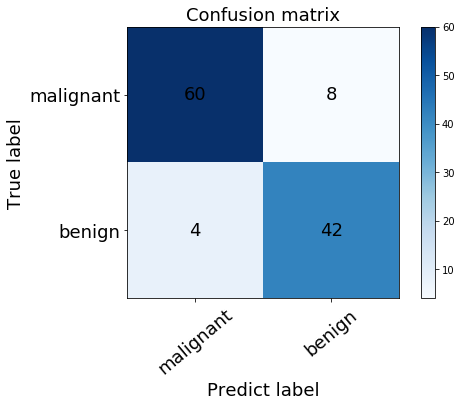

分类正确个数: 102 总样本个数: 114 正确率: 0.8947368421052632

-------------------------------------------------------


------------------第 2 轮
现在是第 0 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.4304344335273695
当前代价函数为: [[0.67301364]]
现在是第 1 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.3846264555339605
当前代价函数为: [[0.65414729]]
现在是第 2 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.3405576493250018
当前代价函数为: [[0.63646001]]
现在是第 3 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.2983275598494008
当前代价函数为: [[0.61986606]]
现在是第 4 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.2579858968236433
当前代价函数为: [[0.60428334]]
现在是第 5 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.219539896338272
当前代价函数为: [[0.58963437]]
现在是第 6 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.182963088711927
当前代价函数为: [[0.57584671]]
现在是第 7 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.1482040230415995
当前代价函数为: [[0.56285323]]
现在是第 8 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.1151940389395143
当前代价函数为: [[0.5505921]]
现在是第 9 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.0838536718445213
当前代价函数为: [[0.53900663]]
现在是第 10 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.0540976290511392
当前代价函数为: [[0.52804497]]
现在是第 11 次迭代
梯度

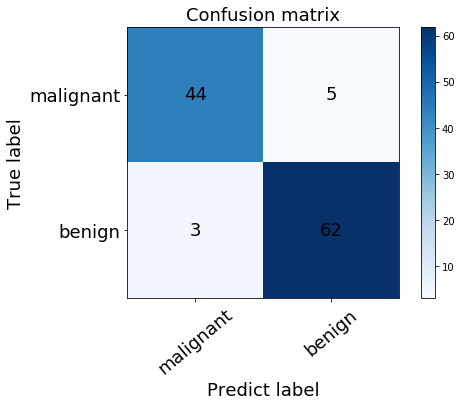

分类正确个数: 106 总样本个数: 114 正确率: 0.9298245614035088

-------------------------------------------------------


------------------第 3 轮
现在是第 0 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.3880875311026064
当前代价函数为: [[0.67418509]]
现在是第 1 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.3440698127845765
当前代价函数为: [[0.6564048]]
现在是第 2 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.3017422748015597
当前代价函数为: [[0.63972391]]
现在是第 3 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.261210632989731
当前代价函数为: [[0.62406204]]
现在是第 4 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.2225286430696234
当前代价函数为: [[0.60934213]]
现在是第 5 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.1857057919050724
当前代价函数为: [[0.59549137]]
现在是第 6 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.1507164165607207
当前代价函数为: [[0.58244172]]
现在是第 7 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.117508780390982
当前代价函数为: [[0.57013018]]
现在是第 8 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.0860131813148959
当前代价函数为: [[0.55849881]]
现在是第 9 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.0561486627339043
当前代价函数为: [[0.54749452]]
现在是第 10 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.0278282502362597
当前代价函数为: [[0.53706889]]
现在是第 11 次迭代
梯度

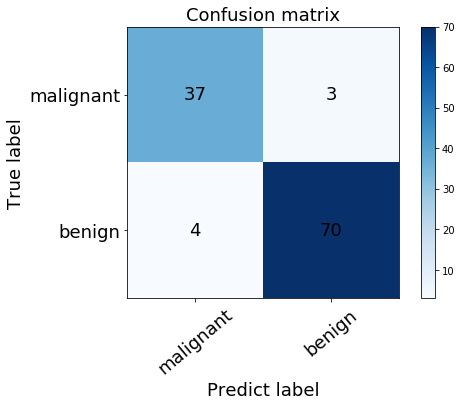

分类正确个数: 107 总样本个数: 114 正确率: 0.9385964912280702

-------------------------------------------------------


------------------第 4 轮
现在是第 0 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.429970574923301
当前代价函数为: [[0.67304151]]
现在是第 1 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.3821146595889549
当前代价函数为: [[0.65425703]]
现在是第 2 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.336188971332203
当前代价函数为: [[0.63669693]]
现在是第 3 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.292304345399795
当前代价函数为: [[0.62026729]]
现在是第 4 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.2505119948261367
当前代价函数为: [[0.60487857]]
现在是第 5 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.2108132568380785
当前代价函数为: [[0.59044665]]
现在是第 6 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.1731706819785486
当前代价函数为: [[0.57689335]]
现在是第 7 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.1375187421168182
当前代价函数为: [[0.56414661]]
现在是第 8 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.1037731481097817
当前代价函数为: [[0.55214048]]
现在是第 9 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.0718383753862333
当前代价函数为: [[0.54081482]]
现在是第 10 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.0416134000090858
当前代价函数为: [[0.53011496]]
现在是第 11 次迭代
梯度

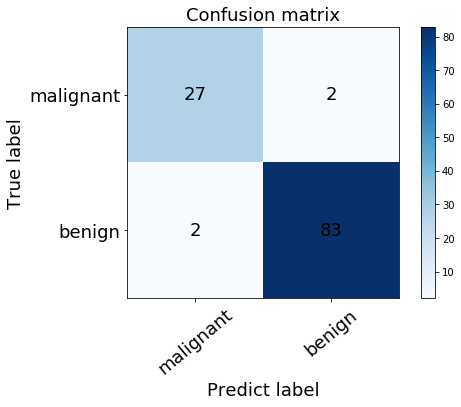

分类正确个数: 110 总样本个数: 114 正确率: 0.9649122807017544

-------------------------------------------------------


------------------第 5 轮
现在是第 0 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.4420646845918699
当前代价函数为: [[0.67268762]]
现在是第 1 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.3955107771547735
当前代价函数为: [[0.65352605]]
现在是第 2 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.350729715714042
当前代价函数为: [[0.63557184]]
现在是第 3 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.3078046252306768
当前代价函数为: [[0.61873728]]
现在是第 4 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.2667763734924562
当前代价函数为: [[0.60293862]]
现在是第 5 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.2276498635505106
当前代价函数为: [[0.58809678]]
现在是第 6 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.1904009155172122
当前代价函数为: [[0.57413779]]
现在是第 7 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.1549830020501786
当前代价函数为: [[0.560993]]
现在是第 8 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.1213333586909382
当前代价函数为: [[0.54859898]]
现在是第 9 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.0893782191269736
当前代价函数为: [[0.53689747]]
现在是第 10 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.059037098704924
当前代价函数为: [[0.52583506]]
现在是第 11 次迭代
梯度的

第 99 个样本预测值为 0.2895673566421083 它的真值是: 0
第 100 个样本预测值为 0.15865486272053236 它的真值是: 0
第 101 个样本预测值为 0.16821775005111003 它的真值是: 0
第 102 个样本预测值为 0.46183696017881 它的真值是: 0
第 103 个样本预测值为 0.37420861085034707 它的真值是: 0
第 104 个样本预测值为 0.4576284452635681 它的真值是: 0
第 105 个样本预测值为 0.15398822389249722 它的真值是: 0
第 106 个样本预测值为 0.9084133320647858 它的真值是: 1
第 107 个样本预测值为 0.9648987951236199 它的真值是: 1
第 108 个样本预测值为 0.9317710164579879 它的真值是: 1
第 109 个样本预测值为 0.8527372039871598 它的真值是: 1
第 110 个样本预测值为 0.6519926159119162 它的真值是: 1
第 111 个样本预测值为 0.9832992855420755 它的真值是: 1
第 112 个样本预测值为 0.10715238372733533 它的真值是: 0
confusion [[24  3]
 [ 2 84]]
len(confusion) 2


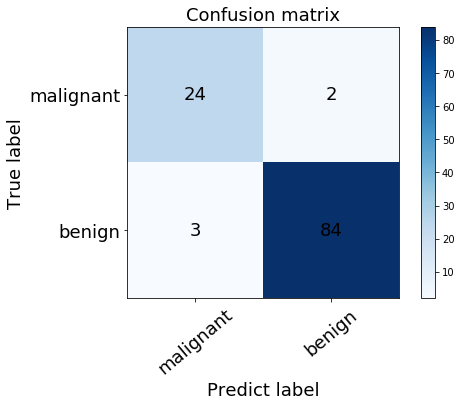

分类正确个数: 108 总样本个数: 113 正确率: 0.9557522123893806

-------------------------------------------------------



In [28]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)#实例化

count = 1 #共5折，表示当前为第几折

#接收每折分类准确率的列表
accuracy = []

for train_index,test_index in kfold.split(data,label):
    #print("Train Index:",train_index,",Test Index:",test_index)
    print("\n------------------第",count,"轮")
    
    #划分训练集测试集
    X_train,X_test=data[train_index],data[test_index]#划分X空间
    y_train,y_test=label[train_index],label[test_index]
    
    #进行模型训练 Training
    model_parameter = LogisticRegression(X_train,y_train).gradient_descent()
    print("模型训练完毕！theta参数为:",model_parameter)
    
    #对训练出的模型进行测试 Testing
    correct = 0 #用correct统计被分类正确样本的个数
    
    #统计用于绘制混淆矩阵的信息
    malignat_malignat = 0 #本来是恶性分类为恶性的样本个数
    malignat_benign = 0#本来是恶性分类为良性的样本个数
    benign_malignat = 0#本来是良性分类为恶性的样本个数
    benign_benign = 0#本来是良性分类为良性的样本个数
    
    for i in range(X_test.shape[0]):
        sample = X_test[i] #取出该样本行向量
        prediction = compute_hypothesis(sample,model_parameter)#计算预测值
        print("第",i,"个样本预测值为",prediction,"它的真值是:",y_test[i])
        judge = -1 #做出判决 初始化为-1，最终为1或0
        #生成决策
        if prediction > 0.5:
            judge = 1
        else:
            judge = 0
        if judge == y_test[i]: #若判决与标签一样
            correct = correct + 1
        
        #判断混淆矩阵中的计数器谁该增加
        if y_test[i] == 1 and judge == 1:
            malignat_malignat += 1
        if y_test[i] == 1 and judge == 0:
            malignat_benign += 1
        if y_test[i] == 0 and judge == 1:
            benign_malignat += 1
        if y_test[i] == 0 and judge == 0:
            benign_benign += 1
    #绘制混淆矩阵
    conf_matrix = np.array([[malignat_malignat,benign_malignat],[malignat_benign,benign_benign]])
    confusion_matrix(conf_matrix)    
    #输出正确率
    acc = correct/X_test.shape[0]
    accuracy.append(acc)#将准确率添加至列表中
    print("分类正确个数:",correct,"总样本个数:",X_test.shape[0],"正确率:",acc)
    print("\n-------------------------------------------------------\n")
    count = count + 1

## 查看模型分类的准确率

In [31]:
print(accuracy)
overall = np.mean(accuracy)
print("整体准确率",overall)

[0.8947368421052632, 0.9298245614035088, 0.9385964912280702, 0.9649122807017544, 0.9557522123893806]
整体准确率 0.9367644775655954
